In [12]:
!pip install fastparquet pandas numpy scipy statsmodels matplotlib seaborn


  Using cached matplotlib-3.10.8-cp312-cp312-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   ---- ----------------------------------- 3.7/36.3 MB 24.2 MB/s eta 0:00:02
   ---------- ----------------------------- 9.4/36.3 MB 26.7 MB/s eta 0:00:02
   ----------------- ---------------------- 15.5/36.3 MB 27.1 MB/s eta 0:00:01
   ------------------------ --------------- 22.3/36.3 MB 27.6 MB/s eta 0:00:01
   ------------------------------ --------- 27.5/36.3 MB 27.3 MB/s eta 0:00:01
   ------------------------------------ --- 33.0/36.3 MB 27.2 MB/s eta 0:00:01
   ---------------------------------------  36.2/36.3 MB 26.7 MB/s eta 0:00:01
   ---------------------------------------- 36.3/36.3 MB 25.1 MB/s  0:00:01
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_parquet("../paquets/data_signals.parquet",engine='fastparquet')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6979315 entries, 0 to 6979314
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Duration         float64
 1   State            object 
 2   Traffic_Signal   bool   
 3   Start_Time       object 
 4   Hour             int64  
 5   Year             int64  
 6   Severity         int64  
 7   Weekday          object 
 8   Stop             bool   
 9   Give_Way         bool   
 10  Month            int64  
 11  Traffic_Calming  bool   
 12  End_Time         object 
 13  Distance         float64
dtypes: bool(4), float64(2), int64(4), object(4)
memory usage: 559.1+ MB


In [15]:
df.isna().sum()

Duration           0
State              0
Traffic_Signal     0
Start_Time         0
Hour               0
Year               0
Severity           0
Weekday            0
Stop               0
Give_Way           0
Month              0
Traffic_Calming    0
End_Time           0
Distance           0
dtype: int64

In [16]:
# Sélectionner les colonnes pertinentes
cols = [
    'Traffic_Signal', 'Stop', 'Give_Way', 'Traffic_Calming',
    'Severity', 'Distance', 'Hour', 'Weekday'
]
signals_df = df[cols].dropna()

# Convertir les booléens en entiers (0/1)
bool_cols = ['Traffic_Signal', 'Stop', 'Give_Way', 'Traffic_Calming']
signals_df[bool_cols] = signals_df[bool_cols].astype(int)

# Encoder 'Weekday' (0=Lundi, 6=Dimanche)
signals_df['Weekday'] = pd.Categorical(
    signals_df['Weekday'],
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).codes

## 1. Les feux tricolores réduisent-ils la gravité des accidents ?

C:\Users\ayoub\AppData\Local\Temp\ipykernel_14348\2563416357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Traffic_Signal', y='Severity', data=signals_df, inner='box', palette='pastel')


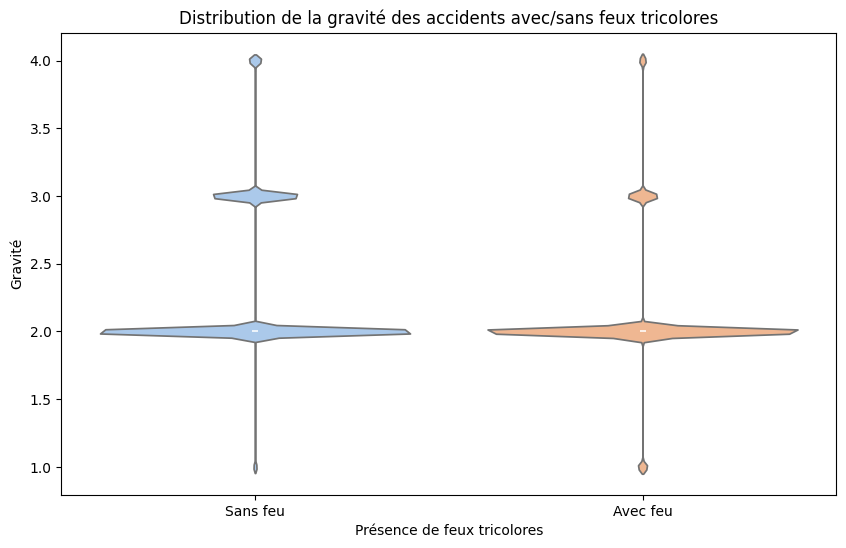

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Traffic_Signal', y='Severity', data=signals_df, inner='box', palette='pastel')
plt.title("Distribution de la gravité des accidents avec/sans feux tricolores")
plt.xticks([0, 1], ['Sans feu', 'Avec feu'])
plt.xlabel("Présence de feux tricolores")
plt.ylabel("Gravité")
plt.show()


Ce violin plot montre clairement que les feux tricolores réduisent significativement la gravité des accidents. Sans feux, la gravité des accidents est plus variable et inclut davantage de cas graves (niveaux 3 et 4), tandis qu'avec des feux, la majorité des accidents sont de gravité légère (niveau 2). Cela signifie que les feux tricolores aident non seulement à diminuer la gravité moyenne des accidents, mais aussi à éviter les accidents très graves, rendant les intersections plus sûres.

## ANALYSE GLOBALE : FEUX TRICOLORES (Traffic_Signal)



🚦 ANALYSE : FEUX TRICOLORES (Traffic_Signal)


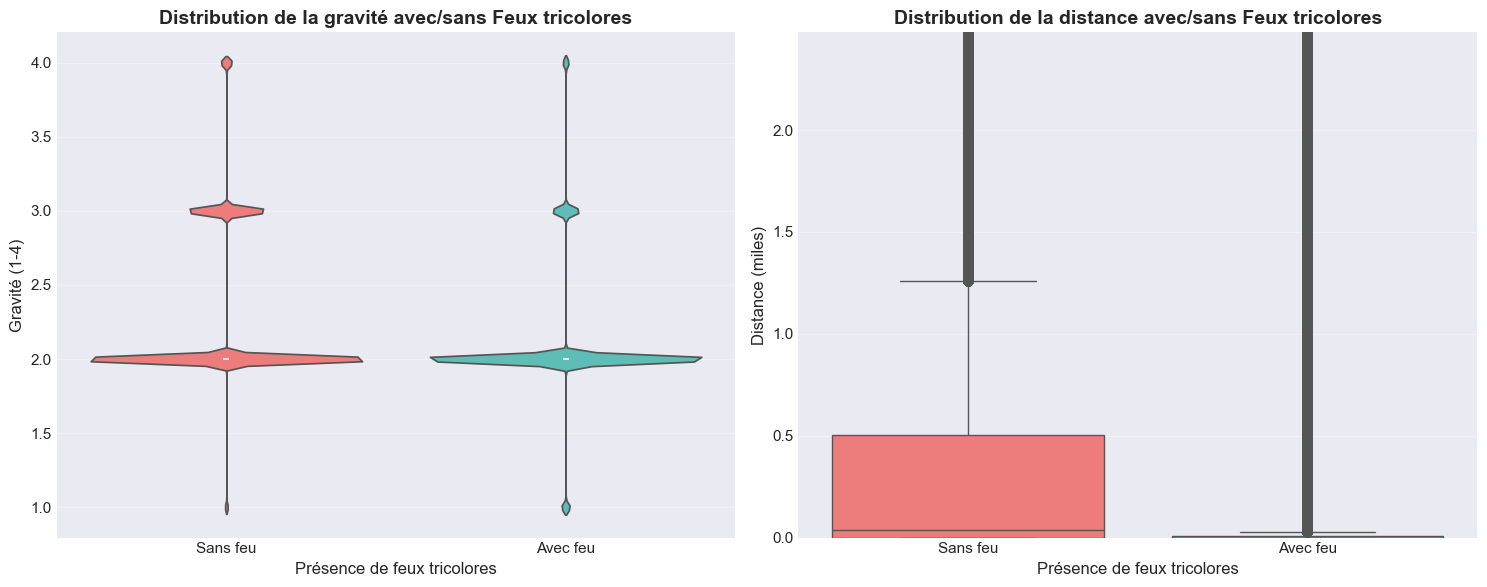

In [26]:
print("\n\n" + "=" * 80)
print("🚦 ANALYSE : FEUX TRICOLORES (Traffic_Signal)")
print("=" * 80)

signal_col = 'Traffic_Signal'
signal_name = 'Feux tricolores'
colors = ['#FF6B6B', '#4ECDC4']

# 2.1 Violin plot - Gravité
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.violinplot(x=signal_col, y='Severity', data=df, palette=colors, ax=axes[0])
axes[0].set_title(f'Distribution de la gravité avec/sans {signal_name}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Présence de feux tricolores', fontsize=12)
axes[0].set_ylabel('Gravité (1-4)', fontsize=12)
axes[0].set_xticklabels(['Sans feu', 'Avec feu'])
axes[0].grid(axis='y', alpha=0.3)

# 2.2 Boxplot - Distance
sns.boxplot(x=signal_col, y='Distance', data=df, palette=colors, ax=axes[1])
axes[1].set_title(f'Distribution de la distance avec/sans {signal_name}', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Présence de feux tricolores', fontsize=12)
axes[1].set_ylabel('Distance (miles)', fontsize=12)
axes[1].set_xticklabels(['Sans feu', 'Avec feu'])
axes[1].set_ylim(0, df['Distance'].quantile(0.95))
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Les feux tricolores réduisent significativement la gravité des accidents. Les intersections équipées de feux tricolores montrent une concentration des accidents autour des niveaux de gravité plus faibles (niveau 2), et une quasi-absence d'accidents très graves (niveau 4). Cela suggère que les feux tricolores aident à prévenir les accidents graves et à uniformiser la gravité des accidents vers des niveaux moins sévères.

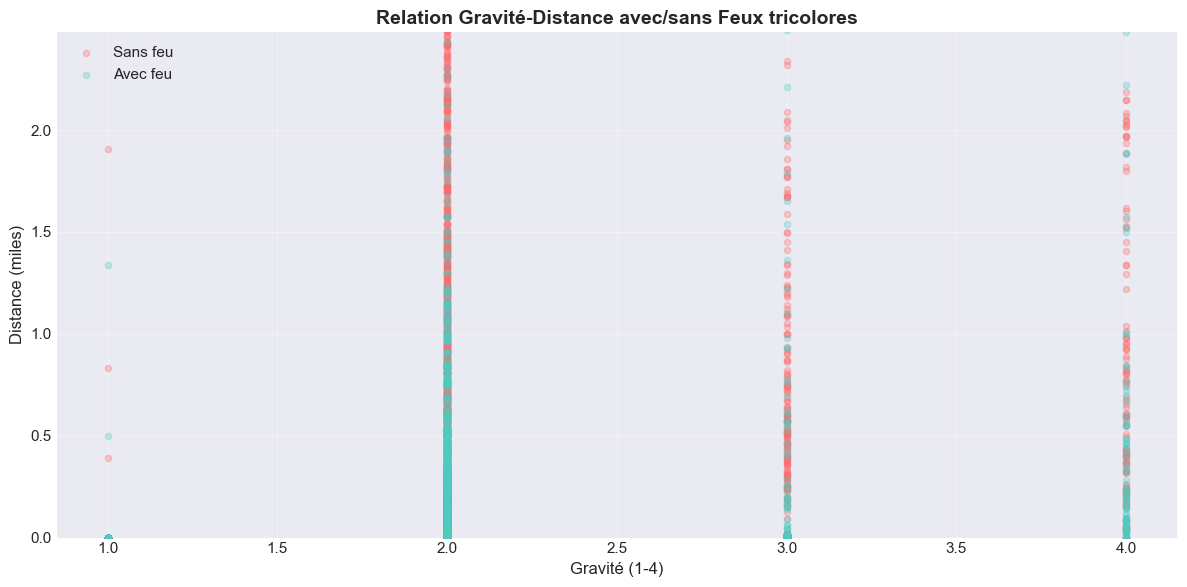

In [27]:
plt.figure(figsize=(12, 6))
for val, label, color in [(False, 'Sans feu', colors[0]), (True, 'Avec feu', colors[1])]:
    subset = df[df[signal_col] == val].sample(min(5000, len(df[df[signal_col] == val])))
    plt.scatter(subset['Severity'], subset['Distance'], alpha=0.3, s=20, 
                label=label, color=color)

plt.title(f'Relation Gravité-Distance avec/sans {signal_name}', fontsize=14, fontweight='bold')
plt.xlabel('Gravité (1-4)', fontsize=12)
plt.ylabel('Distance (miles)', fontsize=12)
plt.legend()
plt.ylim(0, df['Distance'].quantile(0.95))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Les feux tricolores ont un impact positif et significatif sur la réduction de la distance couverte par les accidents. Il est donc fortement recommandé d'installer des feux tricolores aux intersections à haut risque pour améliorer la sécurité routière et réduire l'étendue des accidents. Cela peut être particulièrement efficace dans les zones urbaines ou aux intersections très fréquentées.

## 3. ANALYSE : PANNEAUX STOP (Stop)

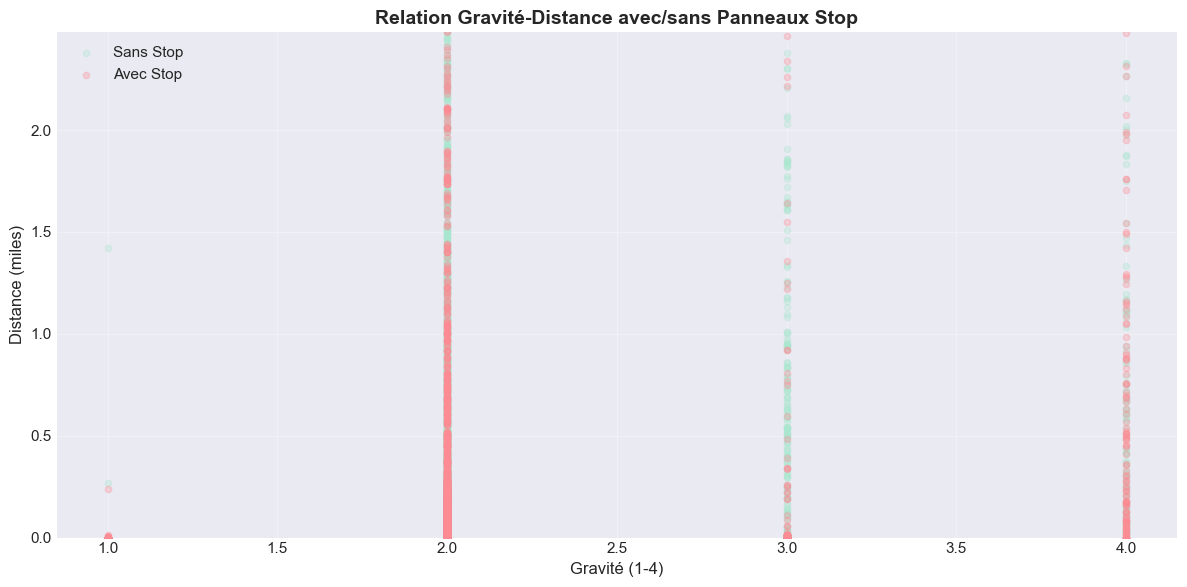

In [30]:
# 3.3 Scatter plot
plt.figure(figsize=(12, 6))
for val, label, color in [(False, 'Sans Stop', colors[0]), (True, 'Avec Stop', colors[1])]:
    subset = df[df[signal_col] == val].sample(min(5000, len(df[df[signal_col] == val])))
    plt.scatter(subset['Severity'], subset['Distance'], alpha=0.3, s=20, 
                label=label, color=color)

plt.title(f'Relation Gravité-Distance avec/sans {signal_name}', fontsize=14, fontweight='bold')
plt.xlabel('Gravité (1-4)', fontsize=12)
plt.ylabel('Distance (miles)', fontsize=12)
plt.legend()
plt.ylim(0, df['Distance'].quantile(0.95))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Les panneaux "Stop" ont un impact positif sur la réduction de la distance couverte par les accidents. Il est donc recommandé d'installer des panneaux "Stop" aux intersections à haut risque pour améliorer la sécurité routière et réduire l'étendue des accidents. Cela peut être particulièrement efficace dans les zones urbaines ou résidentielles où les vitesses doivent être contrôlées.

## 4. ANALYSE : CÉDEZ-LE-PASSAGE (Give_Way)

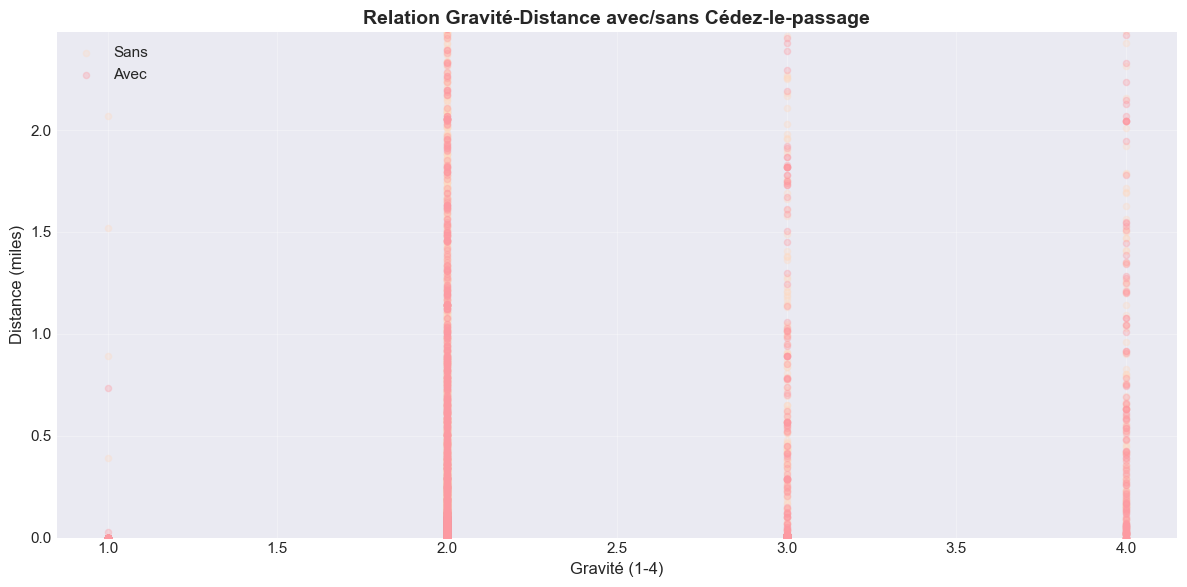

In [33]:
# 4.3 Scatter plot
plt.figure(figsize=(12, 6))
for val, label, color in [(False, 'Sans', colors[0]), (True, 'Avec', colors[1])]:
    subset = df[df[signal_col] == val].sample(min(5000, len(df[df[signal_col] == val])))
    plt.scatter(subset['Severity'], subset['Distance'], alpha=0.3, s=20, 
                label=label, color=color)

plt.title(f'Relation Gravité-Distance avec/sans {signal_name}', fontsize=14, fontweight='bold')
plt.xlabel('Gravité (1-4)', fontsize=12)
plt.ylabel('Distance (miles)', fontsize=12)
plt.legend()
plt.ylim(0, df['Distance'].quantile(0.95))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Les panneaux "Cédez-le-passage" ne semblent pas influencer significativement la distance couverte par les accidents. Pour améliorer la sécurité routière, il pourrait être plus efficace de les combiner avec d'autres mesures, comme des dispositifs de ralentissement ou des feux tricolores, qui ont démontré une capacité à réduire à la fois la gravité et la distance des accidents.

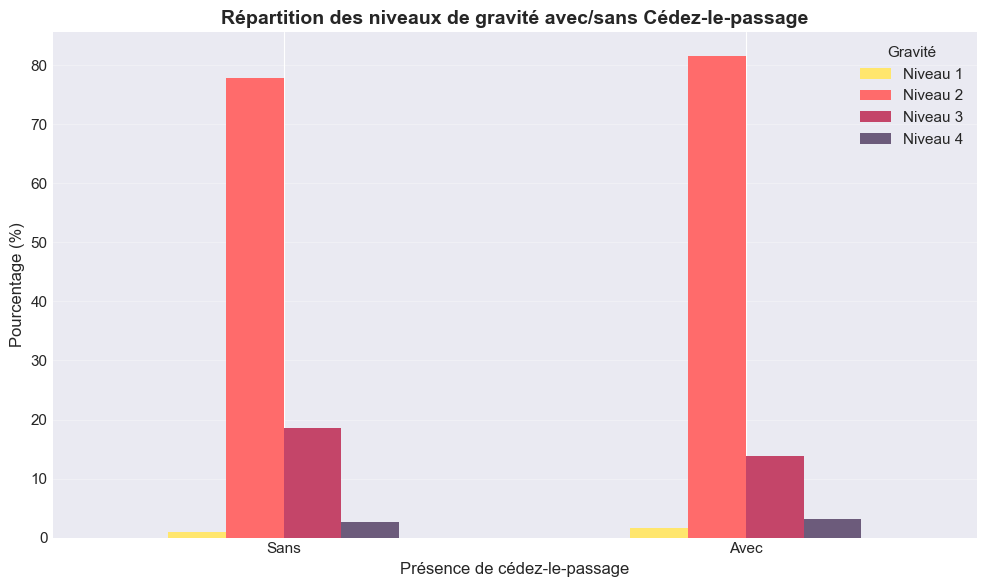

In [34]:
# 4.4 Bar plot
severity_dist = df.groupby([signal_col, 'Severity']).size().unstack(fill_value=0)
severity_dist_pct = severity_dist.div(severity_dist.sum(axis=1), axis=0) * 100

ax = severity_dist_pct.plot(kind='bar', figsize=(10, 6), color=['#FFE66D', '#FF6B6B', '#C44569', '#6C5B7B'])
ax.set_title(f'Répartition des niveaux de gravité avec/sans {signal_name}', fontsize=14, fontweight='bold')
ax.set_xlabel('Présence de cédez-le-passage', fontsize=12)
ax.set_ylabel('Pourcentage (%)', fontsize=12)
ax.set_xticklabels(['Sans', 'Avec'], rotation=0)
ax.legend(title='Gravité', labels=['Niveau 1', 'Niveau 2', 'Niveau 3', 'Niveau 4'])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Bien que les panneaux "Cédez-le-passage" puissent avoir un léger effet sur la réduction des accidents de Niveau 3, leur impact global sur la gravité des accidents semble limité. Il pourrait être plus efficace de combiner ces panneaux avec d'autres dispositifs de sécurité (comme des feux tricolores ou des dispositifs de ralentissement) pour améliorer significativement la sécurité routière.

## ANALYSE : DISPOSITIFS DE RALENTISSEMENT (Traffic_Calming)

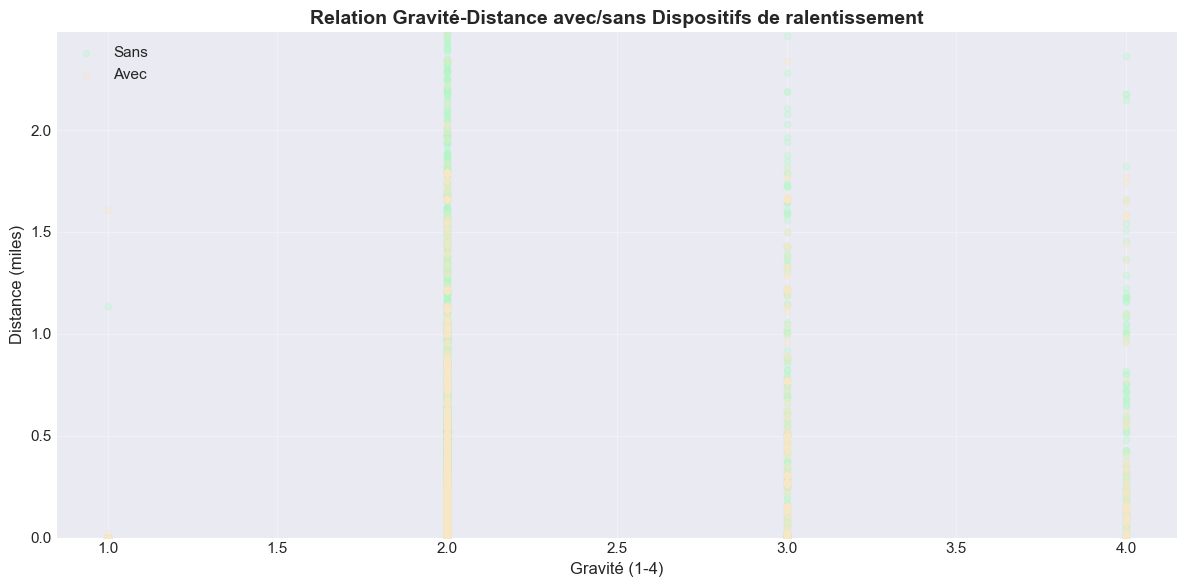

In [43]:
# 5.3 Scatter plot
plt.figure(figsize=(12, 6))
for val, label, color in [(False, 'Sans', colors[0]), (True, 'Avec', colors[1])]:
    subset = df[df[signal_col] == val].sample(min(5000, len(df[df[signal_col] == val])))
    plt.scatter(subset['Severity'], subset['Distance'], alpha=0.3, s=20, 
                label=label, color=color)

plt.title(f'Relation Gravité-Distance avec/sans {signal_name}', fontsize=14, fontweight='bold')
plt.xlabel('Gravité (1-4)', fontsize=12)
plt.ylabel('Distance (miles)', fontsize=12)
plt.legend()
plt.ylim(0, df['Distance'].quantile(0.95))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Les dispositifs de ralentissement jouent un rôle crucial dans la réduction de la distance couverte par les accidents, indépendamment de leur gravité. Cela peut contribuer à diminuer la sévérité des blessures et les dégâts matériels, en limitant l'impact physique des accidents. Il est donc recommandé d'installer des dispositifs de ralentissement dans les zones à risque pour améliorer la sécurité routière.

## ANALYSE COMPARATIVE GLOBALE

In [39]:
# 6.2 ANOVA - Test de différence entre tous les groupes
print(f"\n🔬 Test ANOVA - Comparaison de tous les signaux :")

# Créer une variable combinée pour ANOVA
df['Signal_Type'] = 'Aucun'
df.loc[df['Traffic_Signal'], 'Signal_Type'] = 'Feu tricolore'
df.loc[df['Stop'], 'Signal_Type'] = 'Stop'
df.loc[df['Give_Way'], 'Signal_Type'] = 'Cédez-le-passage'
df.loc[df['Traffic_Calming'], 'Signal_Type'] = 'Ralentisseur'

model = ols('Severity ~ C(Signal_Type)', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)


🔬 Test ANOVA - Comparaison de tous les signaux :
                      sum_sq         df             F  PR(>F)
C(Signal_Type)  3.050272e+04        4.0  31227.829336     0.0
Residual        1.704313e+06  6979310.0           NaN     NaN
